# Visualize Ethereum Data with Plotly

This demo describes how to collect and visualize Ethereum data by using [ClickHouse](https://clickhouse.com/docs/en/) database and [plotly](https://plotly.com/python/getting-started/#overview) graphing libraries.

## Install the Plotly Library

```sh
!pip install plotly
!pip install pandas
```

In [1]:
import plotly.express as px
import pandas as pd

Read sample data and create a scatter chart.

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/chriddyp/5d1ea79569ed194d432e56108a04d188/raw/a9f9e8076b837d541398e999dcbac2b2826a81f8/gdp-life-exp-2007.csv')

fig = px.scatter(df, x="gdp per capita", y="life expectancy",
                 size="population", color="continent", hover_name="country",
                 log_x=True, size_max=60)

In [ ]:
df.head()

In [ ]:
fig.show()

Create a sample stacked bar chart.

In [ ]:
# fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})
fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="relative")

fig.show()

## Connect to ClickHouse Database

```sh
!pip install clickhouse-driver
```

Assume that the database tables and views are defined for Ethereum data as described in [eth-track](https://github.com/open-dovetail/eth-track/blob/master/store/setup.sh), and the data is populated by using the [decoder](https://github.com/open-dovetail/eth-track/tree/master/cmd).

Specify ClickHouse connection parameters:

In [5]:
host='34.201.218.202'
port='9000'
db='ethdb'
user='default'
passwd='Tibco123!'

Specify SQL statement with parameters:

In [9]:
sql='''
SELECT BlockCount, Miner, BlockDate
FROM daily_blocks_by_miner
WHERE BlockDate >= %(start)s
    AND BlockDate <= %(end)s
ORDER BY BlockDate, BlockCount DESC
'''

# pick date range from start of the current month
from datetime import date

endDate = date.today()
startDate = date(endDate.year, endDate.month-1, 1)
print('Date range:', startDate, endDate)

Date range: 2022-01-01 2022-02-03


Connect to database and execute the SQL statement.  Return the result as a dataframe.

In [10]:
from clickhouse_driver import Client

client = Client(host=host, port=port, database=db, user=user, password=passwd, settings={'use_numpy': True})
df = client.query_dataframe(' '.join(sql.split()), {'start': startDate, 'end': endDate})

In [11]:
df.head()

,BlockCount,Miner,BlockDate
0,1973,ea674fdde714fd979de3edf0f56aa9716b898ec8,2022-01-01
1,867,829bd824b016326a401d083b33d092293333a830,2022-01-01
2,634,1ad91ee08f21be3de0ba2ba6918e714da6b45836,2022-01-01
3,342,7f101fe45e6649a6fb8f3f8b43ed03d353f2b90c,2022-01-01
4,237,45a36a8e118c37e4c47ef4ab827a7c9e579e11e2,2022-01-01


Visualize the daily block counts in stacked bar chart.

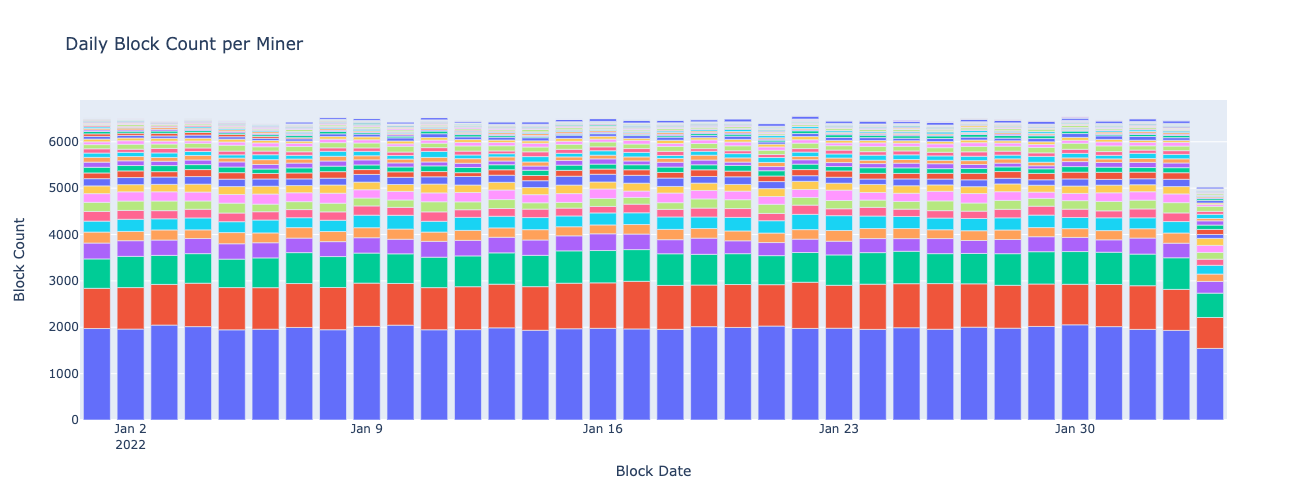

In [12]:
import plotly.express as px

# use stacked bar chart
fig = px.bar(df, x="BlockDate", y="BlockCount", color="Miner", barmode="relative", height=500,
            title="Daily Block Count per Miner",
            labels={
                "BlockDate": "Block Date",
                "BlockCount": "Block Count"
            })

# do not display legend
fig.update_layout(showlegend=False)

fig.show()

Render the chart into browser or other images

In [ ]:
import plotly.io as pio
pio.renderers

In [ ]:
fig.show(renderer='browser')

In [ ]:
fig.show(renderer='pdf')